# Simple Data Model Using Linear Regression (Y = a + bY)

## Creating a data set

In [2]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt


In [6]:
# Creating a simple data for training and testing 
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = bias + weight * X
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [12]:
# Splitting the data in training and testing
train_split = int(0.8 * len(x))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train)

(40, 40)

In [43]:
# Creating a function for plotting the dataset
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data = X_test,
                     test_labels = y_test,
                     predictions = None
                    ):
    plt.figure(figsize=(10,7))

    # Plt the training data in blue
    plt.scatter(train_data,train_labels,color="blue",s=4,label="Training data")
    # Plt the testing data in green
    plt.scatter(test_data,test_labels,color="green",s=4,label="Testing data")

    if predictions is not None:
        plt.scatter(test_data,predictions,color="red",s=4,label="Predictions")
    plt.legend()

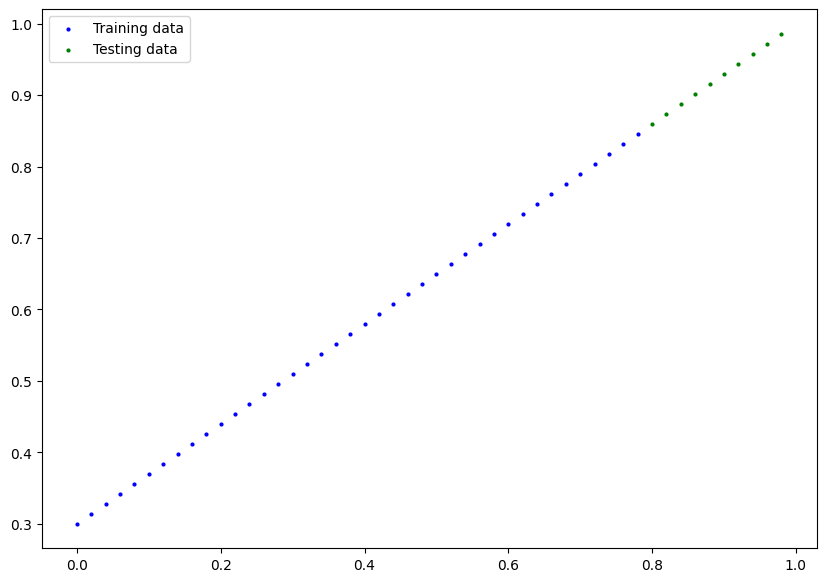

In [44]:
plot_predictions()

In [59]:
# Build model
class LinearRegression(nn.Module):
    # intializing 
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                                requires_grad = True,# This is set by default dont need to set it 
                                                dtype = torch.float   
                                               ))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))


    # forward defines the computation in the model
    def forward(self,x:torch.Tensor):
        return self.weight * x + self.bias



In [60]:
# Set the manual seed
torch.manual_seed(42)

model_0 = LinearRegression()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [61]:
# Name the parameterss
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

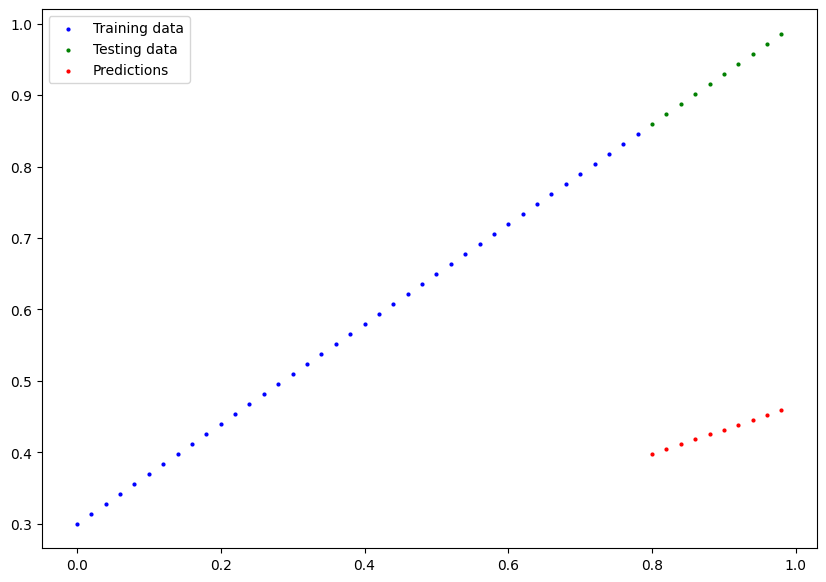

In [62]:
# Make Predictions
with torch.inference_mode():
    y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

In [64]:
y_test - y_preds
# Bad predictions as the values does not match

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [65]:
# Train the model to make corerct predrictions
# Create a Loss function using MAE
loss_fn = nn.L1Loss() # this loss is same as l1loss

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [69]:
# Noe crete an optimization loop
torch.manual_seed(42)

# This number tells how many times the model will pass over the trainig data
epochs = 100

train_loss_values = []
test_loss_values = []
epochs_count = []


for epochs in range(epochs):
    # training
    model_0.train() # Putting model in training mode
    # 1. Forward pass on training data using the foward() method inside 
    y_pred = model_0(X_train)
    # 2. Creating the loss fucntion to calculate the loss
    loss = loss_fn(y_pred,y_train)
    # 3. Zero grad of the optimizer
    optimizer.zero_grad()
    # 4. Loss backward()
    loss.backward() # This is the backward propagation
    # Progrwess the optimizer
    optimizer.step()

    # Testing
    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred,y_test)
        test_loss

    if epochs % 10 == 0:
        epochs_count.append(epochs)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epochs} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
        



Epoch: 0 | MAE Train Loss: 0.02376994863152504 | MAE Test Loss: 0.05494590476155281 
Epoch: 10 | MAE Train Loss: 0.02033500373363495 | MAE Test Loss: 0.046673357486724854 
Epoch: 20 | MAE Train Loss: 0.016896454617381096 | MAE Test Loss: 0.0390876941382885 
Epoch: 30 | MAE Train Loss: 0.013468016870319843 | MAE Test Loss: 0.030815154314041138 
Epoch: 40 | MAE Train Loss: 0.010031387209892273 | MAE Test Loss: 0.022542614489793777 
Epoch: 50 | MAE Train Loss: 0.006594526115804911 | MAE Test Loss: 0.01495695672929287 
Epoch: 60 | MAE Train Loss: 0.0031660839449614286 | MAE Test Loss: 0.006684416439384222 
Epoch: 70 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 80 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 90 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 


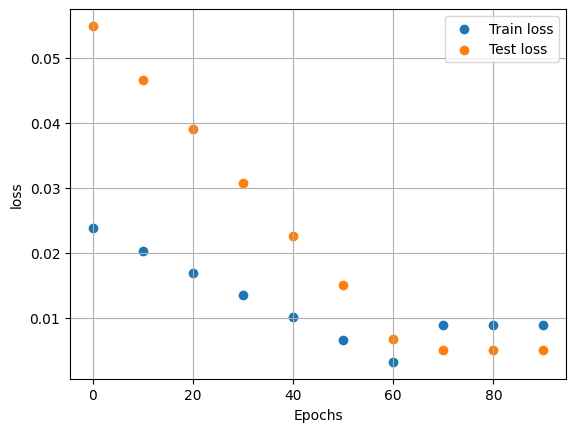

In [71]:
plt.scatter(epochs_count,train_loss_values,label="Train loss")
plt.scatter(epochs_count,test_loss_values, label="Test loss")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.grid()
plt.legend()

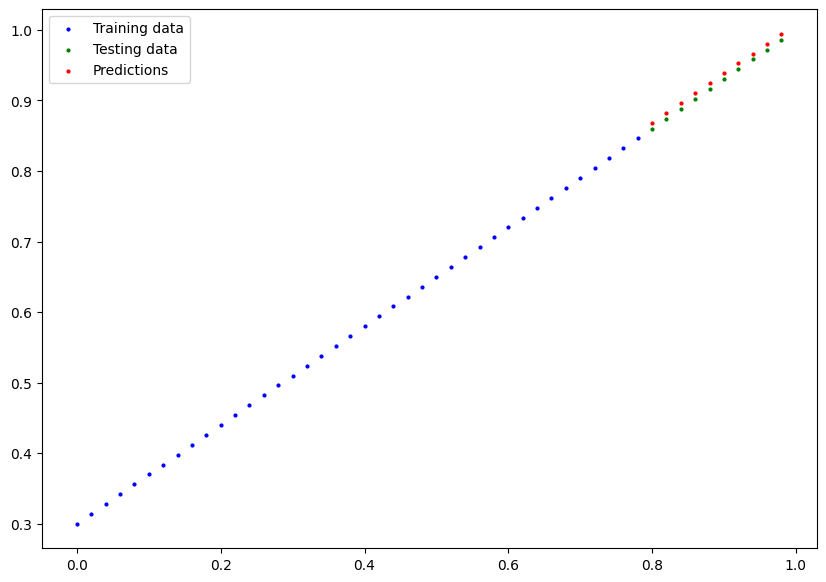

In [75]:
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)
    
plot_predictions(predictions=y_preds)